In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import patches, colors, cm
import vice
# from src.plots.utils import filter_multioutput_stars, zheights

# Plot settings
plt.rcParams.update({
    'xtick.direction': 'in',
    'xtick.top': True,
    'ytick.direction': 'in',
    'ytick.right': True,
    'figure.dpi': 140,
    'figure.figsize': (4, 4),
    'font.family': 'STIXgeneral',
    'mathtext.fontset': 'cm',
})

Plotting functions:

In [2]:
def scatter_hist(ax, x, y, xlim=None, ylim=None, log_norm=True, cmap='gray',
                 cmin=10, vmin=None, vmax=None, nbins=50, color='k'):
    """
    Generate a scatter plot and overlayed 2D histogram for dense data.

    Parameters
    ----------
    ax : matplotlib.axis.Axes
        Axes object on which to plot the data.
    x : array-like
        Horizontal coordinates of the data points.
    y : array-like
        Vertical coordinates of the data points.
    xlim : float, optional
        Bounds for x-axis. The default is None.
    ylim : float, optional
        Bounds for y-axis. The default is None.
    log_norm : bool, optional
        Shade the 2D histogram on a logarithmic scale. The default is True.
    cmap : str, optional
        Colormap for 2D histogram. The default is'gray'.
    cmin : int, optional
        Minimum counts per bin; any number below this will show individual points.
        The default is 10.
    vmin : float or None, optional
        Value to map to minimum of histogram normalization. The default is None.
    vmax : float or None, optional
        Value to map to maximum of histogram normalization. The default is None.
    nbins : int or tuple of ints, optional
        Number of histogram bins. If a tuple, presumed to be (xbins, ybins).
        The default is 50.
    color : str, optional
        Color of individual points. The default is 'k'.

    Returns
    -------
    matplotlib.axis.Axes

    """
    # Set automatic plot bounds
    if not xlim:
        xlim = (np.min(x), np.max(x))
    if not ylim:
        ylim = (np.min(y), np.max(y))
    # Set bin edges
    if type(nbins) == 'tuple':
        xbins, ybins = nbins
    else:
        xbins = ybins = nbins
    xbins = np.linspace(xlim[0], xlim[1], num=xbins, endpoint=True)
    ybins = np.linspace(ylim[0], ylim[1], num=ybins, endpoint=True)
    # Histogram normalization
    if log_norm:
        norm = colors.LogNorm(vmin=vmin, vmax=vmax)
    else:
        norm = colors.Normalize(vmin=vmin, vmax=vmax)
        
    ax.scatter(x, y, c=color, s=0.5, rasterized=True)
    ax.hist2d(x, y, bins=[xbins, ybins], cmap=cmap, norm=norm, cmin=cmin)
        
    dx = xbins[1] - xbins[0]
    dy = ybins[1] - ybins[0]
    ax.set_xlim((xlim[0] - 2*dx, xlim[1] + 2*dx))
    ax.set_ylim((ylim[0] - 2*dy, ylim[1] + 2*dy))
    
    return ax

In [3]:
# Import data
data_dir = '/mnt/c/Users/dubay.11/OneDrive - The Ohio State University/Documents/Docs/First Year Project/Data'
# data_dir = '~/Documents/Data'
data = pd.read_csv(Path(data_dir) / 'dr17_cut_data.csv')
data

,APOGEE_ID,TELESCOPE,FIELD,ALT_ID,RA,DEC,GLON,GLAT,J,J_ERR,...,APOKASC2_AGE,APOKASC2_AGE_PERR,APOKASC2_AGE_MERR,APOKASC2_AV,APOKASC2_AV_ERR,APOKASC2_NOTE,APOK2_MASS,APOK2_MASS_ERR,APOK2_RADIUS,APOK2_RADIUS_ERR
0,2M00000002+7417074,apo25m,120+12,none,0.000103,74.285408,119.401807,11.767414,8.597,0.039,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
1,2M00000035-7323394,lco25m,SMC12,none,0.001467,-73.394287,307.939441,-43.230305,15.008,0.045,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
2,2M00000068+5710233,apo25m,N7789,none,0.002850,57.173164,115.977154,-5.002392,10.664,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
3,2M00000133+5721163,apo25m,NGC7789_btx,none,0.005558,57.354549,116.014776,-4.824917,13.261,0.029,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
4,2M00000211+6327470,apo25m,117+01,none,0.008802,63.463078,117.227985,1.162167,11.880,0.024,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
387942,2M23595837+5700444,apo25m,N7789,none,359.993224,57.012356,115.939899,-5.158948,12.657,0.026,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
387943,2M23595867-7339039,lco25m,SMC12,none,359.994493,-73.651093,307.846602,-42.982597,15.671,0.069,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
387944,2M23595886+5726058,apo25m,116-04,none,359.995265,57.434956,116.025359,-4.745011,11.466,0.024,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN
387945,2M23595921+5609479,apo25m,NGC7789_MGA,none,359.996744,56.163330,115.771964,-5.991363,11.985,0.023,...,NaN,NaN,NaN,NaN,NaN,none,NaN,NaN,NaN,NaN


Functions from James' code:

In [21]:
def analogdata(filename):
    r"""
    Read a data file containing the extra stellar population data.

    Parameters
    ----------
    filename : str
        The name of the file containing the star particle data.

    Returns
    -------
    data : list
        The 2-D list containing the data, sorted by rows.

        - data[i][0] : zone of the formation of the i'th stellar population
        - data[i][1] : time of formation in Gyr of the i'th stellar population
        - data[i][2] : height z above/below the disk midplane at the present day
    """
    data = []
    with open(filename, 'r') as f:
        line = f.readline()
        while line[0] == '#':
            line = f.readline()
        while line != '':
            line = line.split()
            data.append([int(line[0]), float(line[1]), float(line[-1])])
            line = f.readline()
        f.close()
    return data

def weighted_median(values, weights, stop = 0.5):
    r"""
    Compute the n'th percentile of a weighted distribution. Despite the name,
    this function can compute any percentile, but by default it will be the
    50th (i.e. the median).

    Parameters
    ----------
    values : ``list``
        The values for which the n'th percentile given some weightes is to be
        calculated.
    weights : ``list``
        The weights themselves. Must be the same length as ``values``.
    stop : ``float`` [default : 0.5]
        In decimal representation, the percentile at which to stop the
        calculation. Default corresponds to 50th percentile.

    Returns
    -------
    median : ``float``
        The ``stop``'th percentile of the distribution of ``values``, weighted
        by ``weights``.
    """
    indeces = np.argsort(values)
    values = [values[i] for i in indeces]
    weights = [weights[i] for i in indeces]
    weights = [i / sum(weights) for i in weights]
    s = 0
    for i in range(len(weights)):
        s += weights[i]
        if s > stop:
            idx = i - 1
            break
    return values[idx]

def median_errorbars(stars, x, y, bins):
    # measure population-averaged trend
    medians = (len(bins) - 1) * [0.]
    lowers = (len(bins) - 1) * [0.]
    uppers = (len(bins) - 1) * [0.]
    for i in range(len(medians)):
        stars_ = stars.filter(y, ">=", bins[i])
        stars_ = stars_.filter(y, "<=", bins[i + 1])
        if len(stars_[x]) > 20:
            masses = [a * (1 - vice.cumulative_return_fraction(b)) for a, b in
                zip(stars_["mass"], stars_[x])]
            medians[i] = weighted_median(stars_[x], masses)
            lowers[i] = weighted_median(stars_[x], masses, stop = 0.16)
            uppers[i] = weighted_median(stars_[x], masses, stop = 0.84)
        else:
            medians[i] = lowers[i] = uppers[i] = float("nan")

    # plot black squares and error bars for trend in mass-weighted median
    xerr = [
        [medians[i] - lowers[i] for i in range(len(medians))],
        [uppers[i] - medians[i] for i in range(len(medians))]
    ]
    kwargs = {
        "xerr": 		xerr,
        "yerr": 		(bins[1] - bins[0]) / 2.,
        "c": 			"k",
        "marker": 		"s", # square
        "linestyle": 	"None",
        "elinewidth": 1,
        "capsize": 2,
    }
    return medians, kwargs

ValueError: First argument must be non-negative.

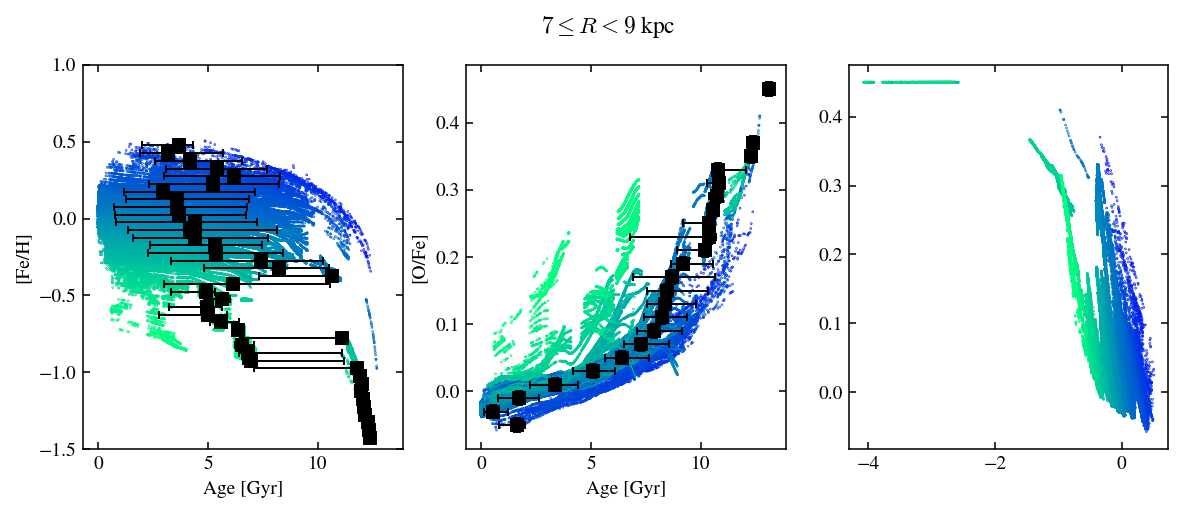

In [22]:
# Test plot
# Input variables
galr_min = 7 # kpc
galr_max = 9
galz_min = 0
galz_max = 0.5
zone_width = 0.1
path = Path('outputs/diffusion/insideout/insideout')
width = 10 # plot width [in]
cmap_stars = 'winter'
min_mass = 1
fe_bins = [-5. + 0.05 * i for i in range(121)]
alpha_bins = [-1. + 0.02 * i for i in range(101)]
fe_lim = [-1.5, 1]

# Set up VICE output
name = path.name
output = vice.output(str(path))
zheights = [row[-1] for row in analogdata("%s_analogdata.out" % (output.name))]
output.stars['abszfinal'] = [abs(k) for k in zheights[:output.stars.size[0]]]
zone_min = int(galr_min / zone_width)
zone_max = int((galr_max - zone_width) / zone_width)
stars = output.stars.filter(
    "zone_final", ">=", zone_min).filter(
    "zone_final", "<=", zone_max).filter(
    "abszfinal", ">=", galz_min).filter(
    "abszfinal", "<=", galz_max).filter(
    "mass", ">=", min_mass)
colors = [zone_width * (i + 0.5) for i in stars['zone_origin']]

# Set up astroNN data
# Limit data within radial zone
# data_zone = data[(data['ASTRONN_GALR'] >= galr_min) & (data['ASTRONN_GALR'] < galr_max)]

fig, axs = plt.subplots(1, 3, figsize=(width, width/2.75))
fig.suptitle(r'$%s \leq R < %s$ kpc' % (galr_min, galr_max))

# [Fe/H] vs Age
ax = axs[0]
sc = ax.scatter(stars['age'], stars['[Fe/H]'], c=colors, s=0.1, cmap=cmap_stars, vmin=0, vmax=15, rasterized=True)
medians, kwargs = median_errorbars(stars, 'age', '[Fe/H]', fe_bins)
ax.errorbar(medians, [(a + b) / 2. for a, b in zip(fe_bins[1:], fe_bins[:-1])], **kwargs)
ax.set_ylim(fe_lim)
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('[Fe/H]')

# [O/Fe] vs Age
ax = axs[1]
ax.scatter(stars['age'], stars['[O/Fe]'], c=colors, s=0.1, cmap=cmap_stars, vmin=0, vmax=15, rasterized=True)
medians, kwargs = median_errorbars(stars, 'age', '[O/Fe]', alpha_bins)
ax.errorbar(medians, [(a + b) / 2. for a, b in zip(alpha_bins[1:], alpha_bins[:-1])], **kwargs)
ax.set_xlabel('Age [Gyr]')
ax.set_ylabel('[O/Fe]')

# [O/Fe] vs [Fe/H]
ax = axs[2]
ax.scatter(stars['[Fe/H]'], stars['[O/Fe]'], c=colors, s=0.1, cmap=cmap_stars, vmin=0, vmax=15, rasterized=True)
medians, kwargs = median_errorbars(stars, '[Fe/H]', '[O/Fe]', alpha_bins)
ax.errorbar(medians, [(a + b) / 2. for a, b in zip(alpha_bins[1:], alpha_bins[:-1])], **kwargs)
ax.set_xlim(fe_lim)
ax.set_xlabel('[Fe/H]')
ax.set_ylabel('[O/Fe]')

# Colorbar
cax = plt.gcf().add_axes([0.92, 0.12, 0.02, 0.75])
cbar = plt.colorbar(sc, cax=cax, pad=0, orientation='vertical')
cbar.set_label(r'$R_{\rm{gal}}$ of birth [kpc]', labelpad=10)
cbar.set_ticks(range(2, 16, 2))
plt.subplots_adjust(right=0.9)

plt.show()